<a href="https://colab.research.google.com/github/a-ayushigit/Recommendation_movies/blob/main/RecommendationSystemOnLargeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d amirmotefaker/movielens-10m-dataset-latest-version

Dataset URL: https://www.kaggle.com/datasets/amirmotefaker/movielens-10m-dataset-latest-version
License(s): Community Data License Agreement - Sharing - Version 1.0
 90% 58.0M/64.3M [00:00<00:00, 89.0MB/s]
100% 64.3M/64.3M [00:00<00:00, 71.9MB/s]


In [6]:
from zipfile import ZipFile
df = '/content/movielens-10m-dataset-latest-version.zip'

with ZipFile(df , 'r') as zip :
     zip.extractall()
     print("The dataset is extracted")

The dataset is extracted


In [59]:
movies = pd.read_csv('/content/ml-10M100K/movies.dat' , sep='::', header = None, names =['movieId','title','genres'], engine = 'python')
ratings = pd.read_csv('/content/ml-10M100K/ratings.dat', sep='::', header = None, names =['userId','movieId','rating','timestamp'], engine = 'python')
# tags = pd.read_csv('/content/tags.csv')

In [60]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [62]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10681 non-null  int64 
 1   title    10681 non-null  object
 2   genres   10681 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB


In [63]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [64]:
ratings['rating'] = ratings['rating'].astype(int)

In [65]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
 #   Column     Dtype
---  ------     -----
 0   userId     int64
 1   movieId    int64
 2   rating     int64
 3   timestamp  int64
dtypes: int64(4)
memory usage: 305.2 MB


In [66]:
df1 = movies.merge(ratings , on="movieId" , how="inner")

In [67]:
df1.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5,868254237


In [68]:
df1.drop('timestamp' , axis=1 , inplace=True)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   movieId  int64 
 1   title    object
 2   genres   object
 3   userId   int64 
 4   rating   int64 
dtypes: int64(3), object(2)
memory usage: 381.5+ MB


In [70]:
df1.iloc[:,4:].describe()

,rating
count,1.000005e+07
mean,3.410011e+00
std,1.094722e+00
min,0.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [71]:
#count of individual genres
genres = {}

def count_genres():
  for genre in movies['genres']:
    words = genre.split('|')
    for word in words :
      genres[word] = genres.get(word,0)+1 #counts the occurrences of genre in the dataframe

count_genres()

In [72]:
genres

{'Adventure': 1025,
 'Animation': 286,
 'Children': 528,
 'Comedy': 3703,
 'Fantasy': 543,
 'Romance': 1685,
 'Drama': 5339,
 'Action': 1473,
 'Crime': 1118,
 'Thriller': 1706,
 'Horror': 1013,
 'Mystery': 509,
 'Sci-Fi': 754,
 'IMAX': 29,
 'Documentary': 482,
 'War': 511,
 'Musical': 436,
 'Film-Noir': 148,
 'Western': 275,
 '(no genres listed)': 1}

In [73]:
# replace the no genres listed to None
genres['None'] = genres.pop('(no genres listed)')
#returns the value of the mentioned key

In [74]:
genres

{'Adventure': 1025,
 'Animation': 286,
 'Children': 528,
 'Comedy': 3703,
 'Fantasy': 543,
 'Romance': 1685,
 'Drama': 5339,
 'Action': 1473,
 'Crime': 1118,
 'Thriller': 1706,
 'Horror': 1013,
 'Mystery': 509,
 'Sci-Fi': 754,
 'IMAX': 29,
 'Documentary': 482,
 'War': 511,
 'Musical': 436,
 'Film-Noir': 148,
 'Western': 275,
 'None': 1}

In [75]:
movies['genres'] = movies['genres'].apply(lambda x : x.split('|'))
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
5,6,Heat (1995),"[Action, Crime, Thriller]"
6,7,Sabrina (1995),"[Comedy, Romance]"
7,8,Tom and Huck (1995),"[Adventure, Children]"
8,9,Sudden Death (1995),[Action]
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]"


In [76]:
exploded_movies = movies.explode('genres')
exploded_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10678,65126,Choke (2008),Comedy
10678,65126,Choke (2008),Drama
10679,65130,Revolutionary Road (2008),Drama
10679,65130,Revolutionary Road (2008),Romance


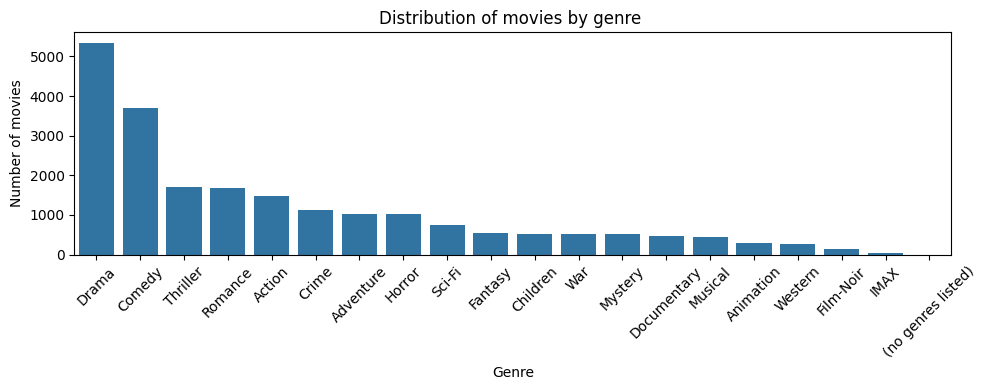

In [77]:
plt.figure(figsize=(10,4))
sns.countplot(data = exploded_movies , x='genres' , order=exploded_movies['genres'].value_counts().index)
plt.title('Distribution of movies by genre ')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
exploded_movies = exploded_movies.merge(ratings , on='movieId' , how='inner' )
exploded_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,5,1,857911264
1,1,Toy Story (1995),Adventure,14,3,1133572007
2,1,Toy Story (1995),Adventure,18,3,1111545931
3,1,Toy Story (1995),Adventure,23,5,849543482
4,1,Toy Story (1995),Adventure,24,5,868254237
...,...,...,...,...,...,...
25967189,65133,Blackadder Back & Forth (1999),Comedy,24495,4,1231081348
25967190,65133,Blackadder Back & Forth (1999),Comedy,33384,3,1231034528
25967191,65133,Blackadder Back & Forth (1999),Comedy,40570,2,1231055397
25967192,65133,Blackadder Back & Forth (1999),Comedy,45430,2,1231105425


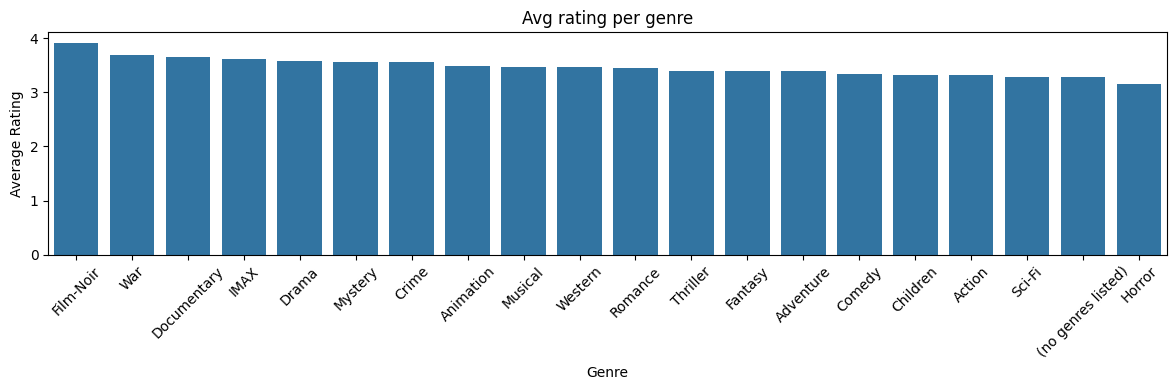

In [79]:
avg_rating_per_genre = exploded_movies.groupby('genres')['rating'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data = avg_rating_per_genre , x='genres' , y='rating' , order=avg_rating_per_genre.sort_values('rating' , ascending=False)['genres'])
plt.title('Avg rating per genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


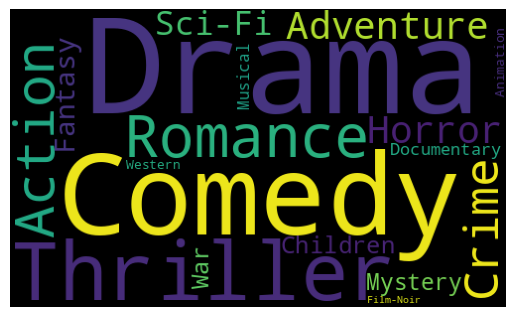

In [80]:
#prepare a wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=500 , height=300 , background_color='black' , min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
df_n_ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())

In [82]:
df_n_ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.500000
'Round Midnight (1986),3.460000
'Til There Was You (1997),2.811258
"'burbs, The (1989)",2.884973
'night Mother (1986),3.431280


In [83]:
df_n_ratings['total ratings'] = df1.groupby('title')['rating'].count()

In [84]:
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

In [85]:
df_n_ratings['mean ratings'] = df_n_ratings['mean ratings'].apply(lambda x : round(x , 2))

In [86]:
df_n_ratings.head()

,mean ratings,total ratings
title,,
"""Great Performances"" Cats (1998)",3.50,6
'Round Midnight (1986),3.46,50
'Til There Was You (1997),2.81,302
"'burbs, The (1989)",2.88,1504
'night Mother (1986),3.43,211


In [87]:
df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Pulp Fiction (1994),4.09,34864
Forrest Gump (1994),3.94,34457
"Silence of the Lambs, The (1991)",4.14,33668
Jurassic Park (1993),3.59,32631
"Shawshank Redemption, The (1994)",4.39,31126
Braveheart (1995),4.02,29154
"Fugitive, The (1993)",3.95,28951
Terminator 2: Judgment Day (1991),3.86,28948
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),4.15,28566


<Figure size 600x400 with 0 Axes>

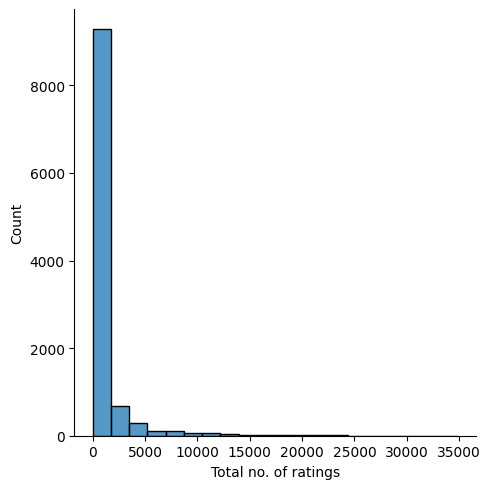

In [88]:
plt.figure(figsize=(6,4))
sns.displot(df_n_ratings['total ratings'] , bins=20) # bins = no. pf parts x axis is divided into
plt.xlabel('Total no. of ratings')
plt.ylabel('Count')
plt.show()

In [89]:
df_n_ratings.sort_values('mean ratings' , ascending=False).head(10)

,mean ratings,total ratings
title,,
Shadows of Forgotten Ancestors (1964),5.00,1
Fighting Elegy (Kenka erejii) (1966),5.00,1
Satan's Tango (Sátántangó) (1994),5.00,2
Sun Alley (Sonnenallee) (1999),5.00,1
"Blue Light, The (Das Blaue Licht) (1932)",5.00,1
Who's Singin' Over There? (a.k.a. Who Sings Over There) (Ko to tamo peva) (1980),4.75,4
"Class, The (Entre les Murs) (2008)",4.67,3
More (1998),4.62,8
"Human Condition II, The (Ningen no joken II) (1959)",4.50,4


In [90]:
print("Total no. of movies with average rating of 5.0 :" , len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]))
print("Total no. of individual users that gave a rating of 5.0 :" , len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) &(df_n_ratings['total ratings'] == 1) ]))

Total no. of movies with average rating of 5.0 : 5
Total no. of individual users that gave a rating of 5.0 : 4


<Figure size 600x400 with 0 Axes>

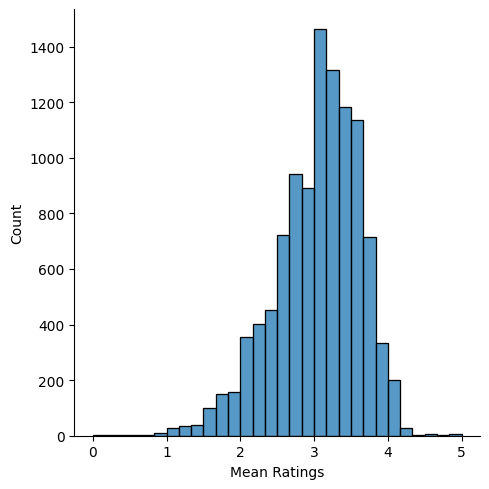

In [91]:
plt.figure(figsize=(6,4))
sns.displot(df_n_ratings['mean ratings'] , bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Count')
plt.show()

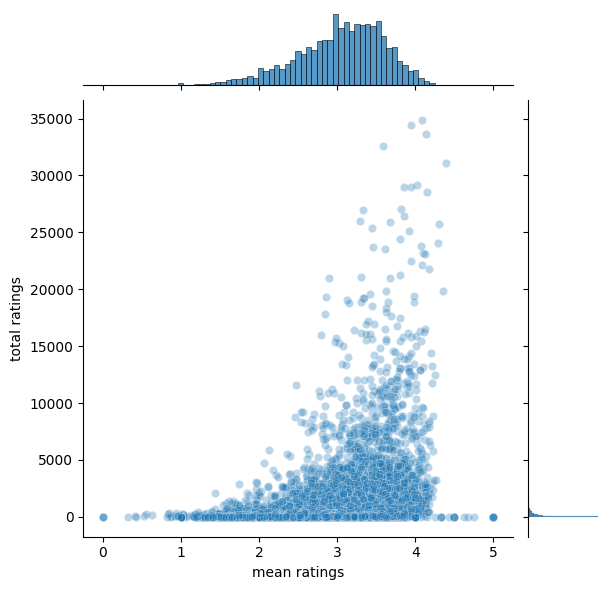

In [92]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings , alpha=0.3)

In [93]:
df_num_rating = df1.groupby('title').count()['rating'].reset_index()

In [94]:
df_num_rating.rename(columns={'rating' : 'num_ratings'} , inplace=True)

In [95]:
df_num_rating.head()

,title,num_ratings
0,"""Great Performances"" Cats (1998)",6
1,'Round Midnight (1986),50
2,'Til There Was You (1997),302
3,"'burbs, The (1989)",1504
4,'night Mother (1986),211


In [96]:
df_avg_rating = df1.groupby('title').mean(numeric_only=True)['rating'].reset_index()

In [97]:
df_avg_rating.rename(columns={'rating': 'avg_rating'},inplace=True)

In [98]:
df_avg_rating.head()

,title,avg_rating
0,"""Great Performances"" Cats (1998)",3.500000
1,'Round Midnight (1986),3.460000
2,'Til There Was You (1997),2.811258
3,"'burbs, The (1989)",2.884973
4,'night Mother (1986),3.431280


In [99]:
#No. of ratings given by each user
sample_df = df1.groupby('userId').count()['rating'].reset_index()
sample_df.head()

,userId,rating
0,1,22
1,2,20
2,3,33
3,4,38
4,5,87


In [100]:
sample_df.describe()

,userId,rating
count,69878.000000,69878.00000
mean,35782.217393,143.10733
std,20613.909098,216.71258
min,1.000000,20.00000
25%,17943.250000,35.00000
50%,35798.500000,69.00000
75%,53619.750000,156.00000
max,71567.000000,7359.00000


In [101]:
#keep users who have given more than 25 ratings
filter_criteria = df1.groupby('userId').count()['rating'] > 50
filtered_users = filter_criteria[filter_criteria].index

In [102]:
filtered_users

Index([    5,     7,     8,    10,    11,    12,    13,    14,    17,    18,
       ...
       71554, 71555, 71557, 71558, 71559, 71560, 71562, 71564, 71565, 71567],
      dtype='int64', name='userId', length=42971)

In [103]:
filtered_rating = df1[df1['userId'].isin(filtered_users)]

In [104]:
filtered_rating.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3


In [105]:
sample_movie_df = filtered_rating.groupby('title').count()['rating'].reset_index()

In [106]:
sample_movie_df.head()

,title,rating
0,"""Great Performances"" Cats (1998)",6
1,'Round Midnight (1986),48
2,'Til There Was You (1997),277
3,"'burbs, The (1989)",1435
4,'night Mother (1986),196


In [107]:
sample_movie_df.describe()

,rating
count,10674.000000
mean,856.024265
std,2140.858032
min,1.000000
25%,33.000000
50%,132.000000
75%,606.000000
max,26771.000000


In [108]:
#eliminate all movies which have been given less than 15 ratings
movie_filter_criteria = filtered_rating.groupby('title').count()['rating'] >= 150

In [109]:
famous_movies = movie_filter_criteria[movie_filter_criteria].index

In [110]:
famous_movies

Index([''Til There Was You (1997)', ''burbs, The (1989)',
       ''night Mother (1986)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)',
       '10 Things I Hate About You (1999)', '10,000 B.C. (2008)',
       '101 Dalmatians (1996)', '101 Reykjavik (101 Reykjavík) (2000)',
       ...
       'Zelig (1983)', 'Zentropa (Europa) (1991)', 'Zero Effect (1998)',
       'Zodiac (2007)', 'Zoolander (2001)',
       'Zorba the Greek (Alexis Zorbas) (1964)', 'Zorro, the Gay Blade (1981)',
       'Zulu (1964)', 'eXistenZ (1999)', 'xXx: State of the Union (2005)'],
      dtype='object', name='title', length=5074)

In [111]:
df_final = filtered_rating[filtered_rating['title'].isin(famous_movies)]

In [112]:
df_final.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3


In [113]:
df_final.describe()

,movieId,userId,rating
count,8.871853e+06,8.871853e+06,8.871853e+06
mean,4.008458e+03,3.588607e+04,3.405128e+00
std,8.600404e+03,2.058797e+04,1.087746e+00
min,1.000000e+00,5.000000e+00,0.000000e+00
25%,7.650000e+02,1.812900e+04,3.000000e+00
50%,1.918000e+03,3.577900e+04,3.000000e+00
75%,3.593000e+03,5.360200e+04,4.000000e+00
max,6.499700e+04,7.156700e+04,5.000000e+00


In [114]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8871853 entries, 0 to 10000015
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   movieId  int64 
 1   title    object
 2   genres   object
 3   userId   int64 
 4   rating   int64 
dtypes: int64(3), object(2)
memory usage: 406.1+ MB


In [115]:
len(df_final['title'].unique())

5074

In [116]:
df_final.to_csv('/content/final_df.csv')

In [117]:
df = df_final.copy()

In [118]:
pt = df.pivot_table(index='userId',columns='title',values='rating')

In [119]:
pt.fillna(0 , inplace=True)

In [120]:
pt.head()

title,'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Things I Hate About You (1999),"10,000 B.C. (2008)",101 Dalmatians (1996),101 Reykjavik (101 Reykjavík) (2000),...,Zelig (1983),Zentropa (Europa) (1991),Zero Effect (1998),Zodiac (2007),Zoolander (2001),Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),eXistenZ (1999),xXx: State of the Union (2005)
userId,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
movie_user_pt = pt.T

In [122]:
movie_user_pt.head()

userId,5,7,8,10,11,12,13,14,17,18,...,71554,71555,71557,71558,71559,71560,71562,71564,71565,71567
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
*batteries not included (1987),0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [125]:
movie_user_sp_matrix = csr_matrix(movie_user_pt.values)

In [126]:
movie_user_sp_matrix

<5074x42971 sparse matrix of type '<class 'numpy.float64'>'
	with 8791317 stored elements in Compressed Sparse Row format>

In [127]:
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(movie_user_sp_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [128]:
np.random.choice(movie_user_pt.shape[0])

3968

In [129]:
query_index = np.random.choice(movie_user_pt.shape[0])

In [130]:
type(movie_user_pt.iloc[query_index,:])

pandas.core.series.Series

In [131]:
distances , indices = model.kneighbors(movie_user_pt.iloc[query_index,:].values.reshape(1,-1) ,n_neighbors=6 )

In [132]:
distances

array([[6.32827124e-15, 6.39983041e-01, 6.46572975e-01, 6.55256577e-01,
        6.76702031e-01, 6.79233040e-01]])

In [133]:
indices

array([[ 788, 2183, 4513, 1710, 2600, 2166]])

In [134]:
def recommend(movie):
  movie_index = np.where(movie_user_pt.index == movie)[0][0]
  distances , indices = model.kneighbors(movie_user_pt.iloc[movie_index,:].values.reshape(1,-1) ,n_neighbors=6 )
  data = []
  for i in indices.flatten()[1:]:  # Skip the first movie (itself)
        data.append(movie_user_pt.index[i])
  return data

In [135]:
recommend('Kung Fu Panda (2008)')

['WALL·E (2008)',
 'Iron Man (2008)',
 'Dark Knight, The (2008)',
 'Hancock (2008)',
 'Incredible Hulk, The (2008)']

In [136]:
SVD = TruncatedSVD(n_components=12 , random_state=17)

In [137]:
matrix = SVD.fit_transform(movie_user_pt)

In [138]:
matrix.shape

(5074, 12)

In [139]:
corr = np.corrcoef(matrix)

In [140]:
corr.shape

(5074, 5074)

In [141]:
movies_list = list(pt.columns)

In [142]:
def recommend_SVD(movie):
  movie_index = movies_list.index(movie)
  corr_movie = corr[movie_index]
  p = list(sorted(enumerate(corr_movie) , key=lambda x:x[1] , reverse=True))
  data = []
  for i in p[1:10] :
    data.append(movies_list[i[0]])
  return data

In [143]:
recommend_SVD('Kung Fu Panda (2008)')

['Indiana Jones and the Kingdom of the Crystal Skull (2008)',
 'Hancock (2008)',
 'WALL·E (2008)',
 'King Kong (2005)',
 'Spider-Man 3 (2007)',
 'Stardust (2007)',
 'Quantum of Solace (2008)',
 "Pirates of the Caribbean: At World's End (2007)",
 'Iron Man (2008)']